<a href="https://colab.research.google.com/github/derrickgzq/crabage/blob/main/STQS4113_Task_1_ganzhengqian_A182343.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STQS4113 Task 1 by Gan Zheng QIan (A182343)

Choose ONE data set and construct an appropriate visualization to describe this data. Your submission file should contain:

a) Justification on choosing the visual

b) The interpretation of the visual

c) The R code

d) The dataset / The source of data

Please remember that plagiarism is STRICTLY PROHIBITED. Zero marks will be given for any plagiarized submission. The task is due on Friday 27th Oct 2023, 9am.

Data source: Kaggle

Data name: Crab Age Prediction

Link: https://www.kaggle.com/datasets/sidhus/crab-age-prediction

Install the required libraries

In [1]:
install.packages("aplpack")
install.packages("plotly")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘Rcpp’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’




Import the libraries

In [2]:
library(readr)
library(aplpack)
library(plotly)

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




Read the data stored from github

In [3]:
ldf = read_csv('https://raw.githubusercontent.com/derrickgzq/crabage/main/CrabAgePrediction.csv')

Rows: 3893 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Sex
dbl (8): Length, Diameter, Height, Weight, Shucked Weight, Viscera Weight, S...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Inspect the number of rows of the data

In [4]:
nrow(ldf)

[1] 3893

Get an overview of the data on how it looks like

In [5]:
head(ldf)

Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
F,1.5500,1.1625,0.3500,28.661344,13.579410,6.761356,7.229122,8


Due to large number of rows, we will sample a total of 200 rows for visualization analysis.

In [6]:
set.seed(123)
ldf_sample = ldf[sample(nrow(ldf), 200), ]

Scatterplot matrix

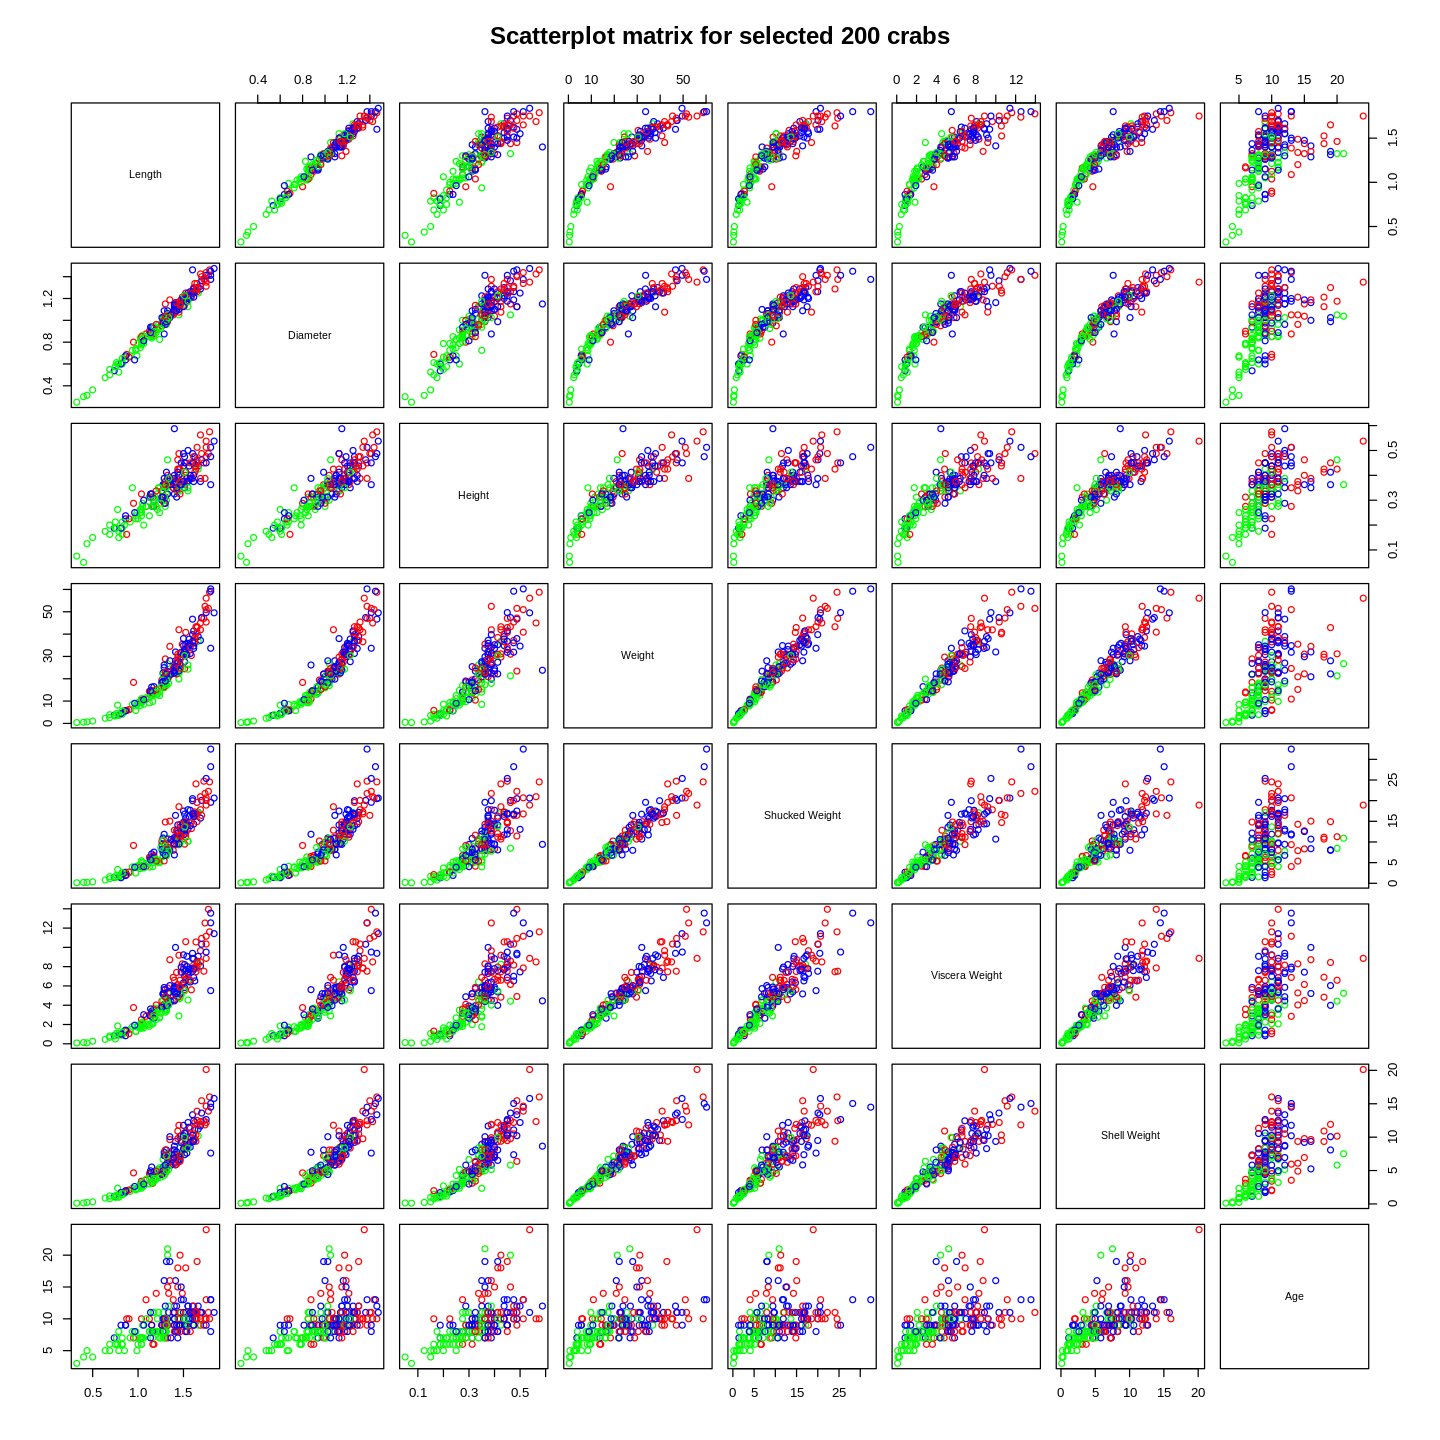

In [27]:
options(repr.plot.width = 12, repr.plot.height = 12)
colors = c('M' = 'blue', 'F' = 'red', 'I' = 'green')
pairs(ldf_sample[,2:9], main = 'Scatterplot matrix for selected 200 crabs', pch = 21, col = colors[ldf_sample$Sex])

The scatterplot matrix is a valuable tool for visualizing data as it allows us to examine the correlations among various crab characteristics, including length, height, weight, and age, all at once. While we have a total of 8 variables to be displayed which is not a very high dimension dataset that is up to 10s or 20s variable, hence scatterplot matrix becomes the ideal visualization tool. This provides a more comprehensive view of the relationships between these variables.

Upon closer inspection, it becomes evident that the data points marked in green, indicating crabs with an indeterminable gender (denoted as I in the dataframe), tend to exhibit smaller values for height, weight, and body length. These data points are predominantly clustered on the left side of the scatter plot. This is due to the fact that these crabs being in the early stages of development, making it challenging to determine their gender. Consequently, they have shorter heights, smaller body lengths, and lighter weights.

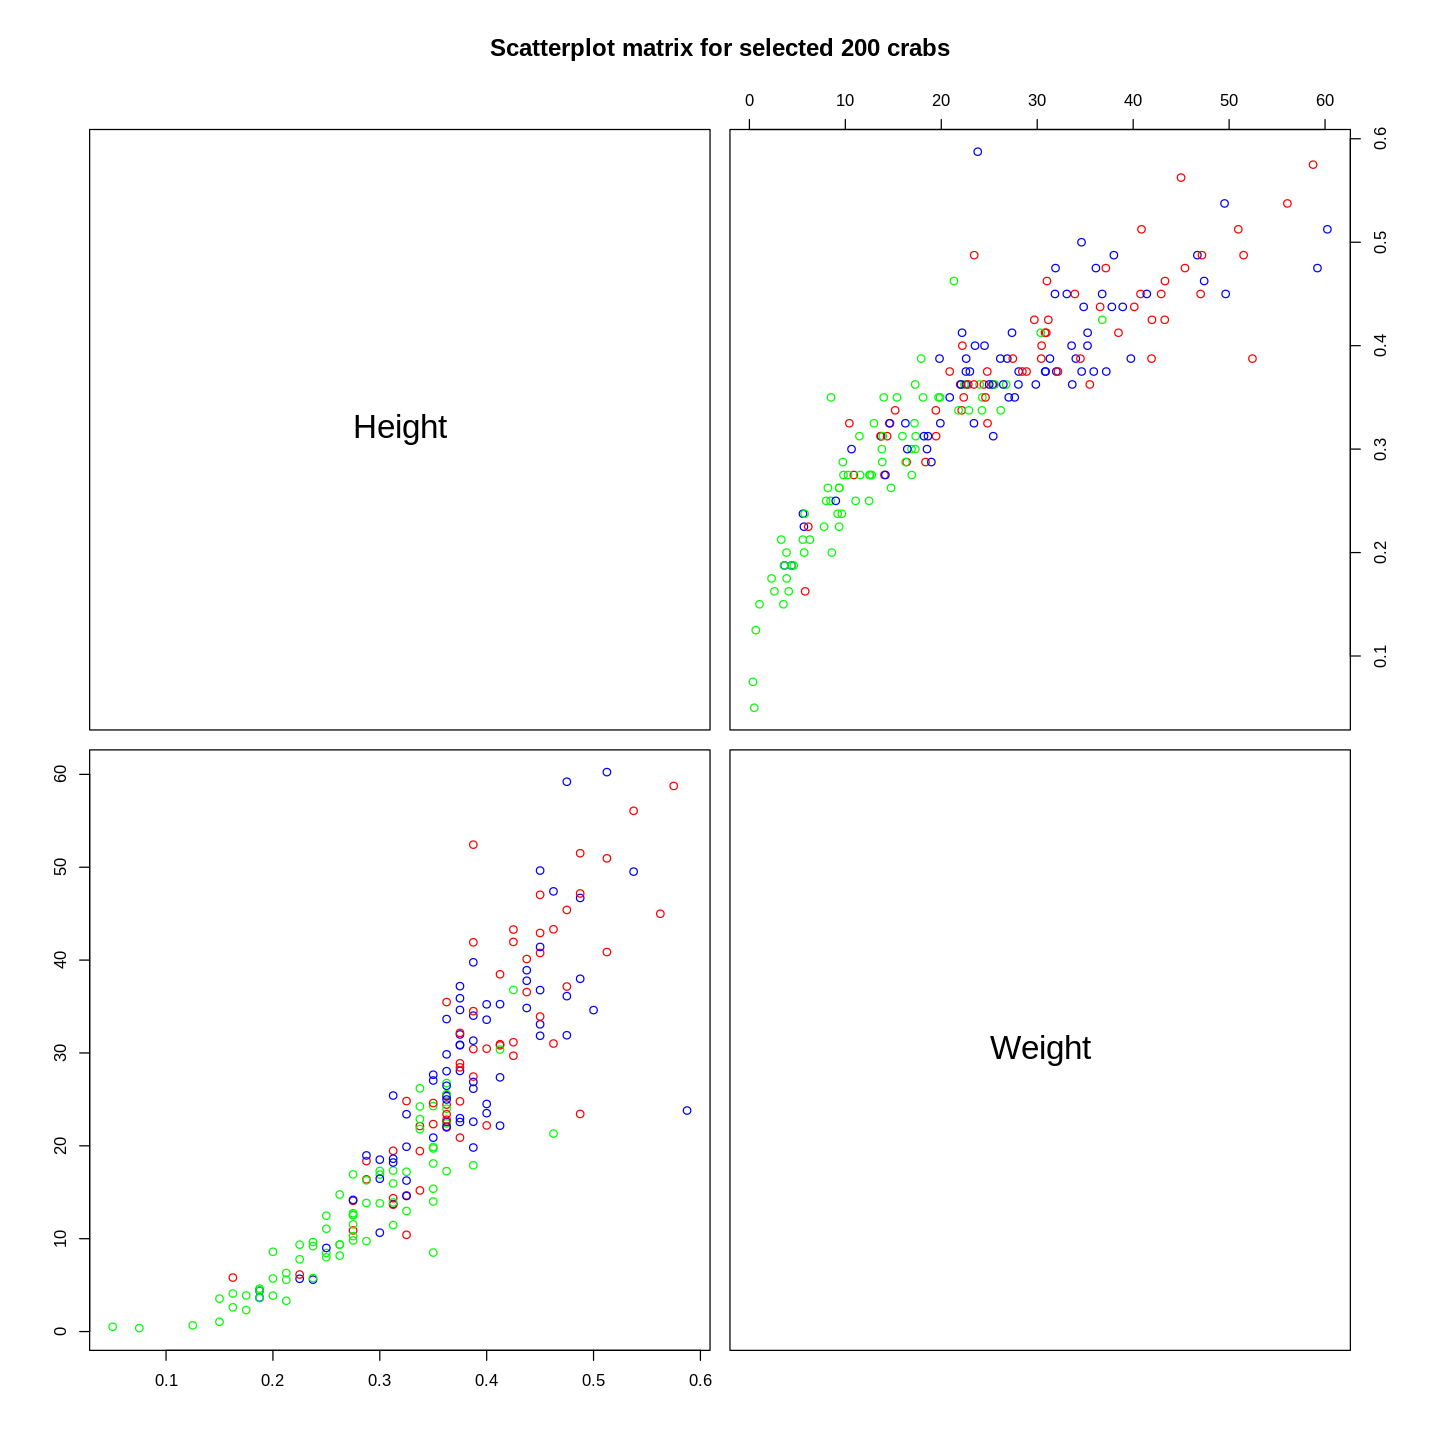

In [30]:
colors = c('M' = 'blue', 'F' = 'red', 'I' = 'green')
pairs(ldf_sample[,4:5], main = 'Scatterplot matrix for selected 200 crabs', pch = 21, col = colors[ldf_sample$Sex])

Besides, in terms of the relationship between weight and height, there seem to be an exponential pattern where a slight increase in weight leads to greater increase of height. While this persists until gradually increase in weight does not bring greater increase in height anymore. This might be caused by these crabs grow a lot in terms of height and weight initially as their shells are softer, and when it hardens, it limits growth in height and hence leading to growth of crab's flesh and increasing weight.

Chernoff faces

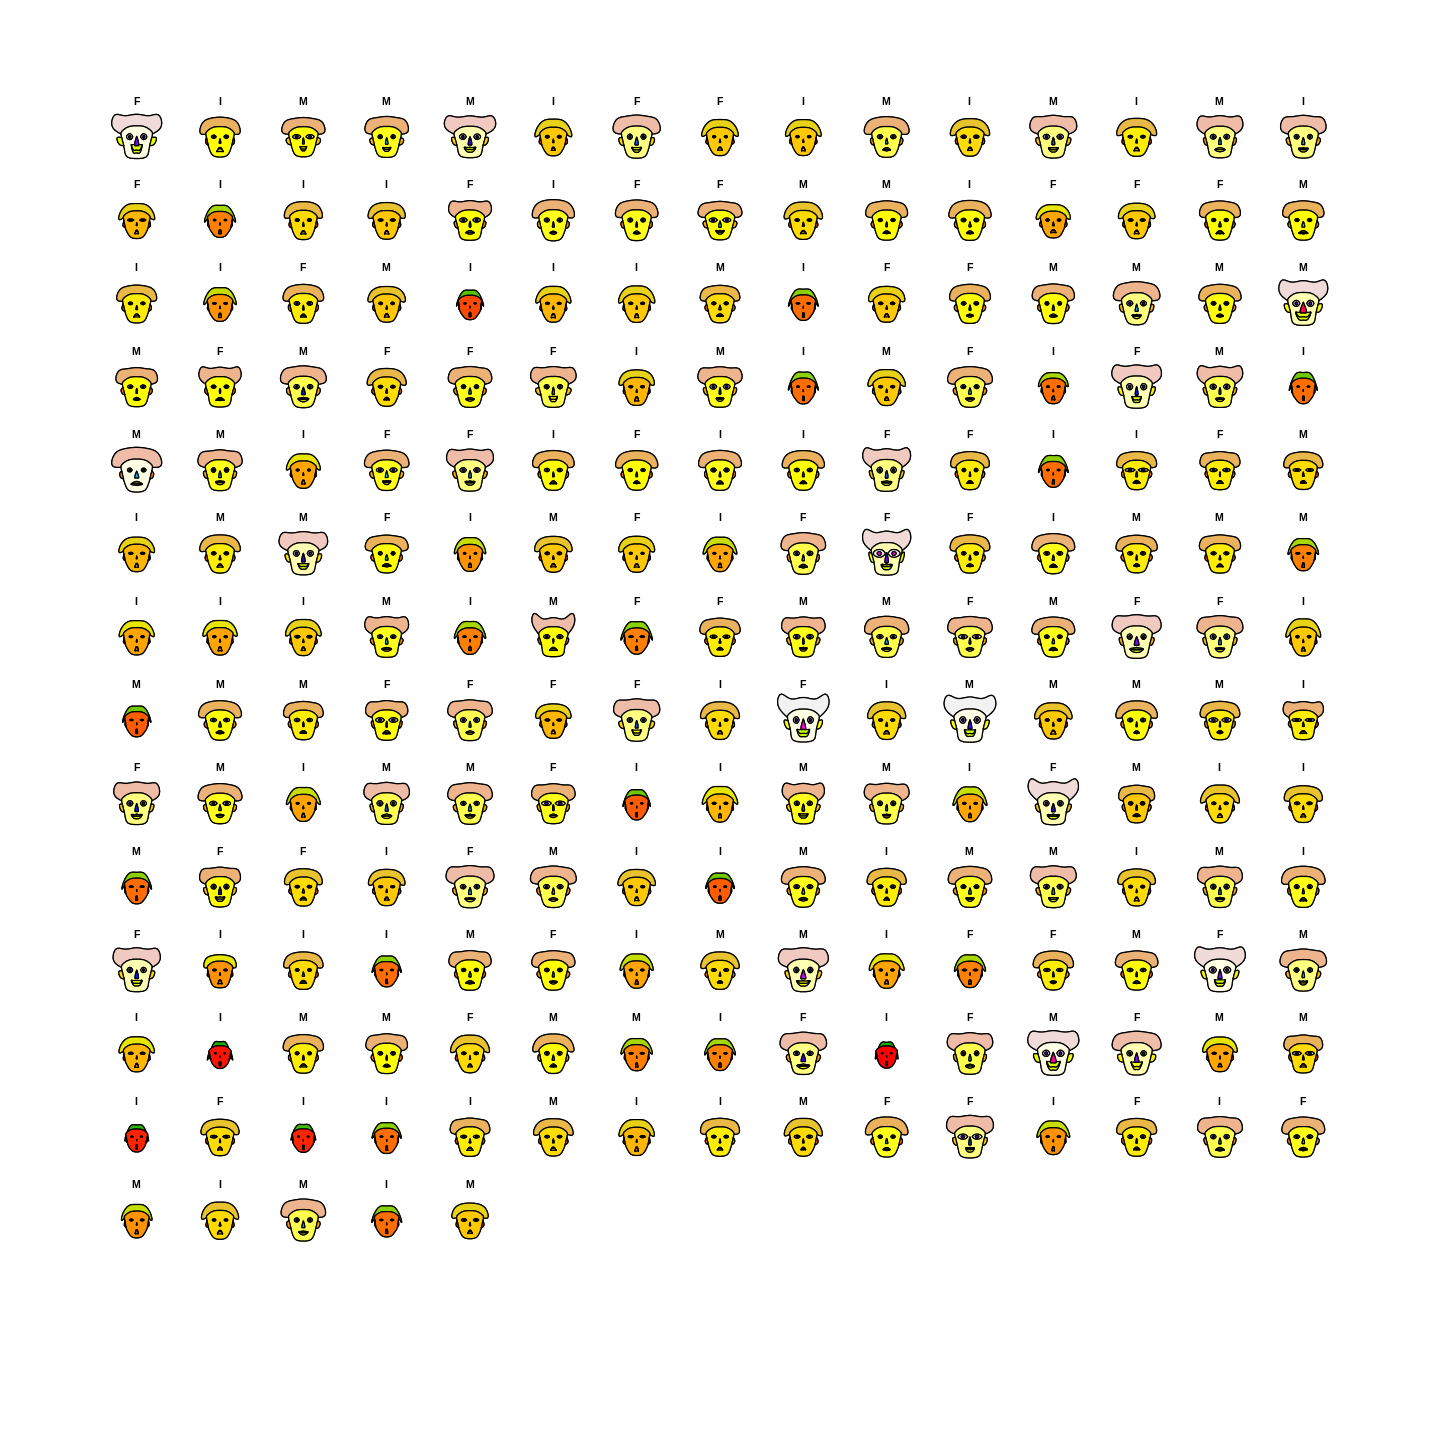

In [37]:
faces(ldf_sample[,-1], labels = ldf_sample$Sex, print.info = FALSE, cex = 0.8, scale = TRUE)

While chernoff faces is used for pattern recognition of the dataset and also for dimensionality reduction. Having 8 variables might not be feasible to inspect at once, therefore it becomes another ideal visualization aid for our dataset.

At a glance of the chernoff faces output, we see most of our crabs are having middle-like facial features, represented by having the average height, weight, length and age. While there are a few where having small or large facial features, meaning these crabs have either very small or very great in height, weight, length and age.

Therefore, we can say that our selected 200 crabs might follow the normal distribution, with most of the crabs are having average height, weight, length and age. While a few are on the extreme ends.

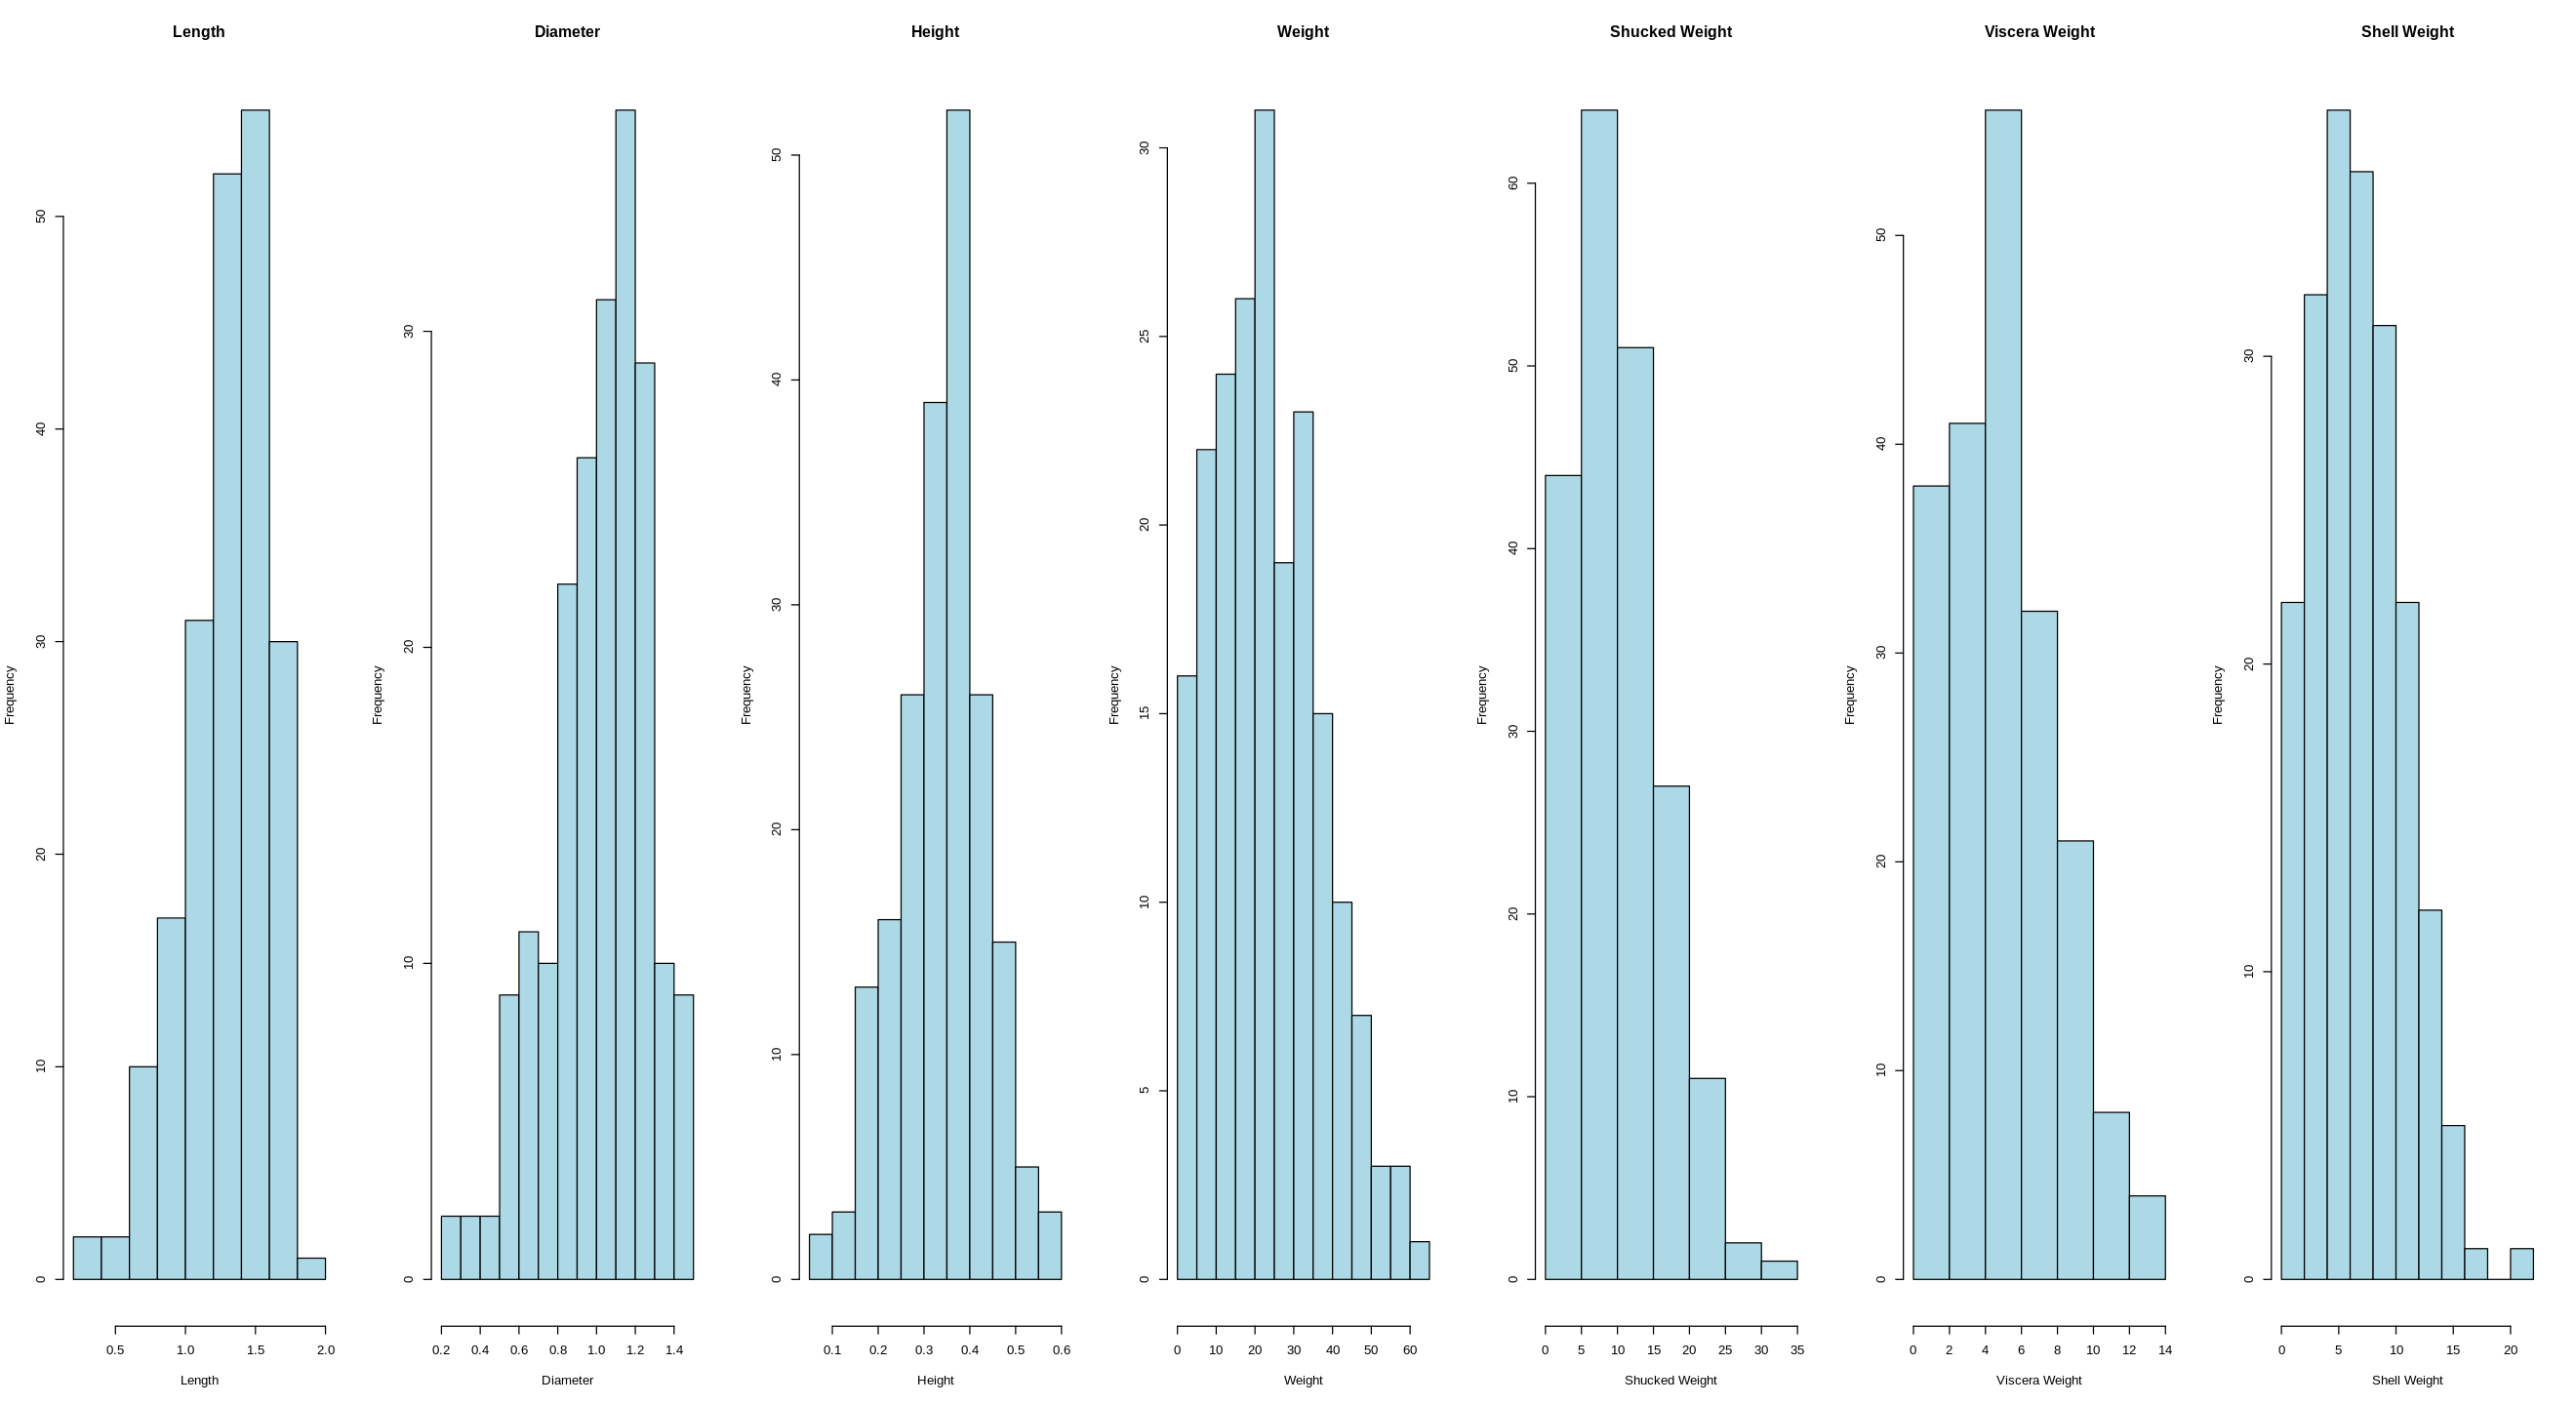

In [45]:
options(repr.plot.width = 22, repr.plot.height = 12)
var = c('Length','Diameter','Height','Weight','Shucked Weight', 'Viscera Weight', 'Shell Weight')
par(mfrow = c(1, length(var)))

for (i in var) {
  hist(ldf_sample[[i]], main = i, xlab = i, col = "lightblue")}

To verify the above statement, histogram plots are built for all the variables and it seems like the height variable shows the heights are in normally distributed most obviously. This presents the drawbacks of using chernoff faces as we might not be able to identify the pattern of data with only having a glance at the overall.